In [25]:
#biblioteki bez których nie wychodzę z domu
import numpy as np
import scipy.io.wavfile as wf
import scipy.fftpack as fft
import matplotlib.pyplot as plt
%matplotlib inline

> Załaduj plik wav z dysku funkcją wavread lub load (jeśli nie ma wavread). Wykonaj wykres w funkcji czasu.

44100

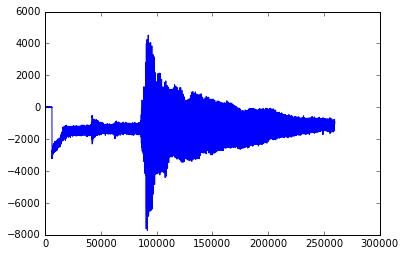

In [26]:
rate, data = wf.read("chord.wav")
plt.plot(data)
rate #częstość zbierania sygnału, faktycznie częstotliwość w Hz

> Oceń stacjonarność sygnału (melodia czy akord).

Nie mam pojęcia. Na podstawie pliku zgaduję że akord, ale to tyle.

> Wyznacz dla całego sygnału lub dla odpowiednich części

Wydaje mi się że trzeba obciąć początkową część przed akordem. Ręcznie kombinując z indeksem początkowym:

175056

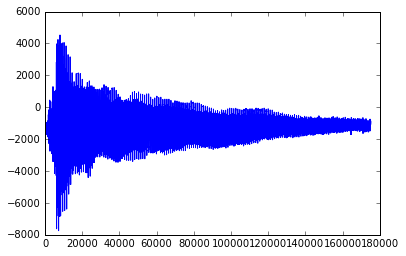

In [27]:
data = data[84400:]
n = len(data) #liczba danych
plt.plot(data)
n

>transformatę Fouriera np z oknem Hamminga (lub dowolnym ale świadomie wybranym) a następnie widmo
mocy. Wykonaj wykres widma mocy w jednostkach dB/Hz, dla przedziału 16Hz - 4kHz.

/home/dominik/.anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/dominik/.anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:525: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


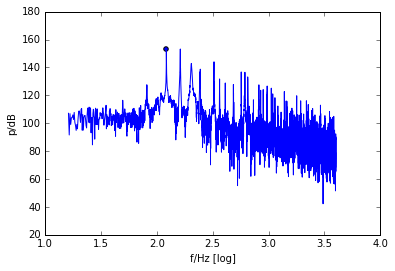

In [28]:
freqbase = rate * ((np.arange(n) + n//2)%n - n//2)/n #"przydatna funkcja" która zwraca częstotliwości poszczególnych składowych
transform = fft.fft(data) #transformujemy dane
#opcjonalnie po drodze można wstawić data*np.hamming(n) ale hgw co to robi i daje
spectrum = transform * transform.conjugate() #mnożę przez sprzężenie zespolone żeby dostać kwadrat modułu (to jak w kwantach)
                                             #o tyle fajny że rzeczywisty

#dolna granica przedziału
bin1 = np.min(np.where(freqbase>16)) #szukam najmniejszego indeksu takiego że częstotliwość jest powyżej 16Hz
#górna granica przedziału
bin2 = np.min(np.where(freqbase>4000)) -1 #szukam największego indeksu takiego że częstotliwość powyżej 4kHz

#wycinam ten konkretny przedział
spectrum = spectrum[bin1:bin2]
freqbase = freqbase[bin1:bin2]

#szukam maximum mocy
peakbin = np.argmax(spectrum)
fPeak = freqbase[peakbin]

plt.plot(np.log10(freqbase), 10*np.log10(spectrum+1e-15))
plt.scatter(np.log10(fPeak), 10*np.log10(spectrum[peakbin]+1e-15))
plt.xlabel("f/Hz [log]")
plt.ylabel("p/dB")
plt.show()
#to się będzie sypało bo spectrum ma jeszcze jakąś niewielką część urojoną, pomijalną tak naprawdę

>Następnie zidentyfikuj akord lub melodię nagrane w pliku (= podaj wszystkie dźwięki wchodzące w skład akordu/melodii).

wat?

>Sugerowana metoda postępowania: obetnij wykres widma mocy (ale nie samo widmo) w pionie i w poziomie tak aby zostały
tam tylko najwyższe piki w skali podwójnie logarytmicznej. Nastęþnie dane zwracane przez funkcję tones
wykorzystaj jako źródło położeń ticków oraz etykiet poziomej osi. Sposób użycia podany jest na końcu skryptu
tones.m. Można także wykorzystać kod funkcji notes i napisać metodę która bierze częstość oraz częstość
podstawową i zwraca najbliższy ton ze skali równomiernie temperowanej oraz ewentualnie odstrojenie do niego
w jednostkach bezwzględnych (Hz) i względnych (podzielone przez samą częstość albo wyrażone w % interwału).
Następnie zrób metodę która zidentyfikuje piki a następnie ich centralne częstości zmienić w nazwy półtonów.
W przypadku pracy nad melodią trzeba zacząć od metody która zidentyfikuje chwile rozpoczęcia kolejnych
dźwięków - dobrze widoczne na wykresie w funkcji czasu.

wat?